In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('smoking_train.csv', sep = ',')
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,yes
1,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,no
2,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,no
3,5,M,30.0,180,75.0,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,no
4,6,M,40.0,160,60.0,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44549,55673,F,60.0,150,50.0,75.0,1.0,1.2,1.0,1.0,...,12.6,1.0,0.8,26.0,21.0,14.0,Y,0,Y,no
44550,55681,F,45.0,160,50.0,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,no
44551,55683,F,55.0,160,50.0,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,no
44552,55684,M,60.0,165,60.0,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,no


In [ ]:
df = df.drop('ID', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44554 entries, 0 to 44553
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               44554 non-null  object 
 1   age                  44114 non-null  float64
 2   height(cm)           44554 non-null  int64  
 3   weight(kg)           44510 non-null  float64
 4   waist(cm)            44554 non-null  float64
 5   eyesight(left)       44554 non-null  float64
 6   eyesight(right)      44554 non-null  float64
 7   hearing(left)        44554 non-null  float64
 8   hearing(right)       44554 non-null  float64
 9   systolic             44554 non-null  float64
 10  relaxation           44554 non-null  float64
 11  fasting blood sugar  44554 non-null  float64
 12  Cholesterol          44554 non-null  float64
 13  triglyceride         44554 non-null  float64
 14  HDL                  44554 non-null  float64
 15  LDL                  44554 non-null 

# Заполнение пропусков

Пропуски в age. 

Кол-во моды (40 лет) знчительно превышает кол-во остальных возрастов. Также практически все опрошенные в взрасте от 20 до 65 лет, для этого диапазона 40 является и средним значением.

Заполним пропуски модой.

In [ ]:
df.age.value_counts()

40.0    11994
45.0     5538
60.0     4877
50.0     4420
55.0     3988
35.0     3566
30.0     3252
25.0     2765
20.0     1267
65.0     1056
70.0      644
75.0      504
80.0      230
85.0       13
Name: age, dtype: int64

In [ ]:
df.age = df.age.fillna(df.age.mode()[0])

In [ ]:
df['weight(kg)'].value_counts()

65.0     6589
60.0     6476
70.0     6216
55.0     5848
75.0     4851
50.0     4440
80.0     3270
85.0     2026
45.0     1896
90.0     1162
95.0      656
40.0      361
100.0     354
105.0     158
110.0      90
115.0      40
35.0       35
120.0      22
125.0       8
30.0        7
130.0       4
135.0       1
Name: weight(kg), dtype: int64

In [ ]:
df['height(cm)'].value_counts()

170    9106
165    7917
160    7087
175    6433
155    6145
150    3592
180    2528
145     998
185     550
140     164
190      28
135       5
130       1
Name: height(cm), dtype: int64

Создаю дополнительный признак - индекс массы тела. I = m / h ^ 2

Т.к. если просто заполним вес модой, то может получится человек ростом 130 см и весом 70 кг или другое сильное отклонение от нормы.

Рассчитать вес через рост и наиболее популярный индекс массы тела (моду) будет более точно.

In [ ]:
df['ima'] = df['weight(kg)'] / (df['height(cm)'] * 0.01) ** 2

In [ ]:
df.ima

0        20.761246
1        25.711662
2        24.973985
3        23.148148
4        23.437500
           ...    
44549    22.222222
44550    19.531250
44551    19.531250
44552    22.038567
44553    25.390625
Name: ima, Length: 44554, dtype: float64

In [ ]:
df['weight(kg)'] = df['weight(kg)'].fillna(df.ima.mode()[0] * (df['height(cm)'] * 0.01) ** 2)

In [ ]:
df['weight(kg)'].value_counts()

65.000000     6589
60.000000     6476
70.000000     6225
55.000000     5848
75.000000     4851
50.000000     4440
80.000000     3270
85.000000     2026
45.000000     1896
90.000000     1162
95.000000      656
40.000000      361
100.000000     354
105.000000     158
110.000000      90
115.000000      40
35.000000       35
120.000000      22
58.192042       11
65.942907        8
74.178201        8
125.000000       8
30.000000        7
62.006920        4
130.000000       4
54.498270        4
135.000000       1
Name: weight(kg), dtype: int64

In [ ]:
df['ima'] = df['weight(kg)'] / (df['height(cm)'] * 0.01) ** 2

In [ ]:
df.isna().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
ima                    0
dtype: int64

Пропусков не осталось.

# Удаление признаков и замена значений

In [ ]:
df.oral.value_counts()

Y    44554
Name: oral, dtype: int64

В признаке oral видим одно и то же значение для всех опрошенных, значит, этот признак не будет оказывать влияние, его можно удалить.

In [ ]:
s = {'F': 0, 'M': 1}
df['gender'] = df['gender'].map(s)
s = {'Y': 1, 'N': 0}
df.tartar = df.tartar.map(s)
s = {'yes': 1, 'no' : 0}
df.smoking = df.smoking.map(s)
y = df.smoking
df = df.drop('oral', axis = 1)

Пройдёмся по признакам. Цель - найти и заменить невозможные выбросы. Например, давление 220 - 240 вряд ли может быть зафиксировано даже у нездорового человека.

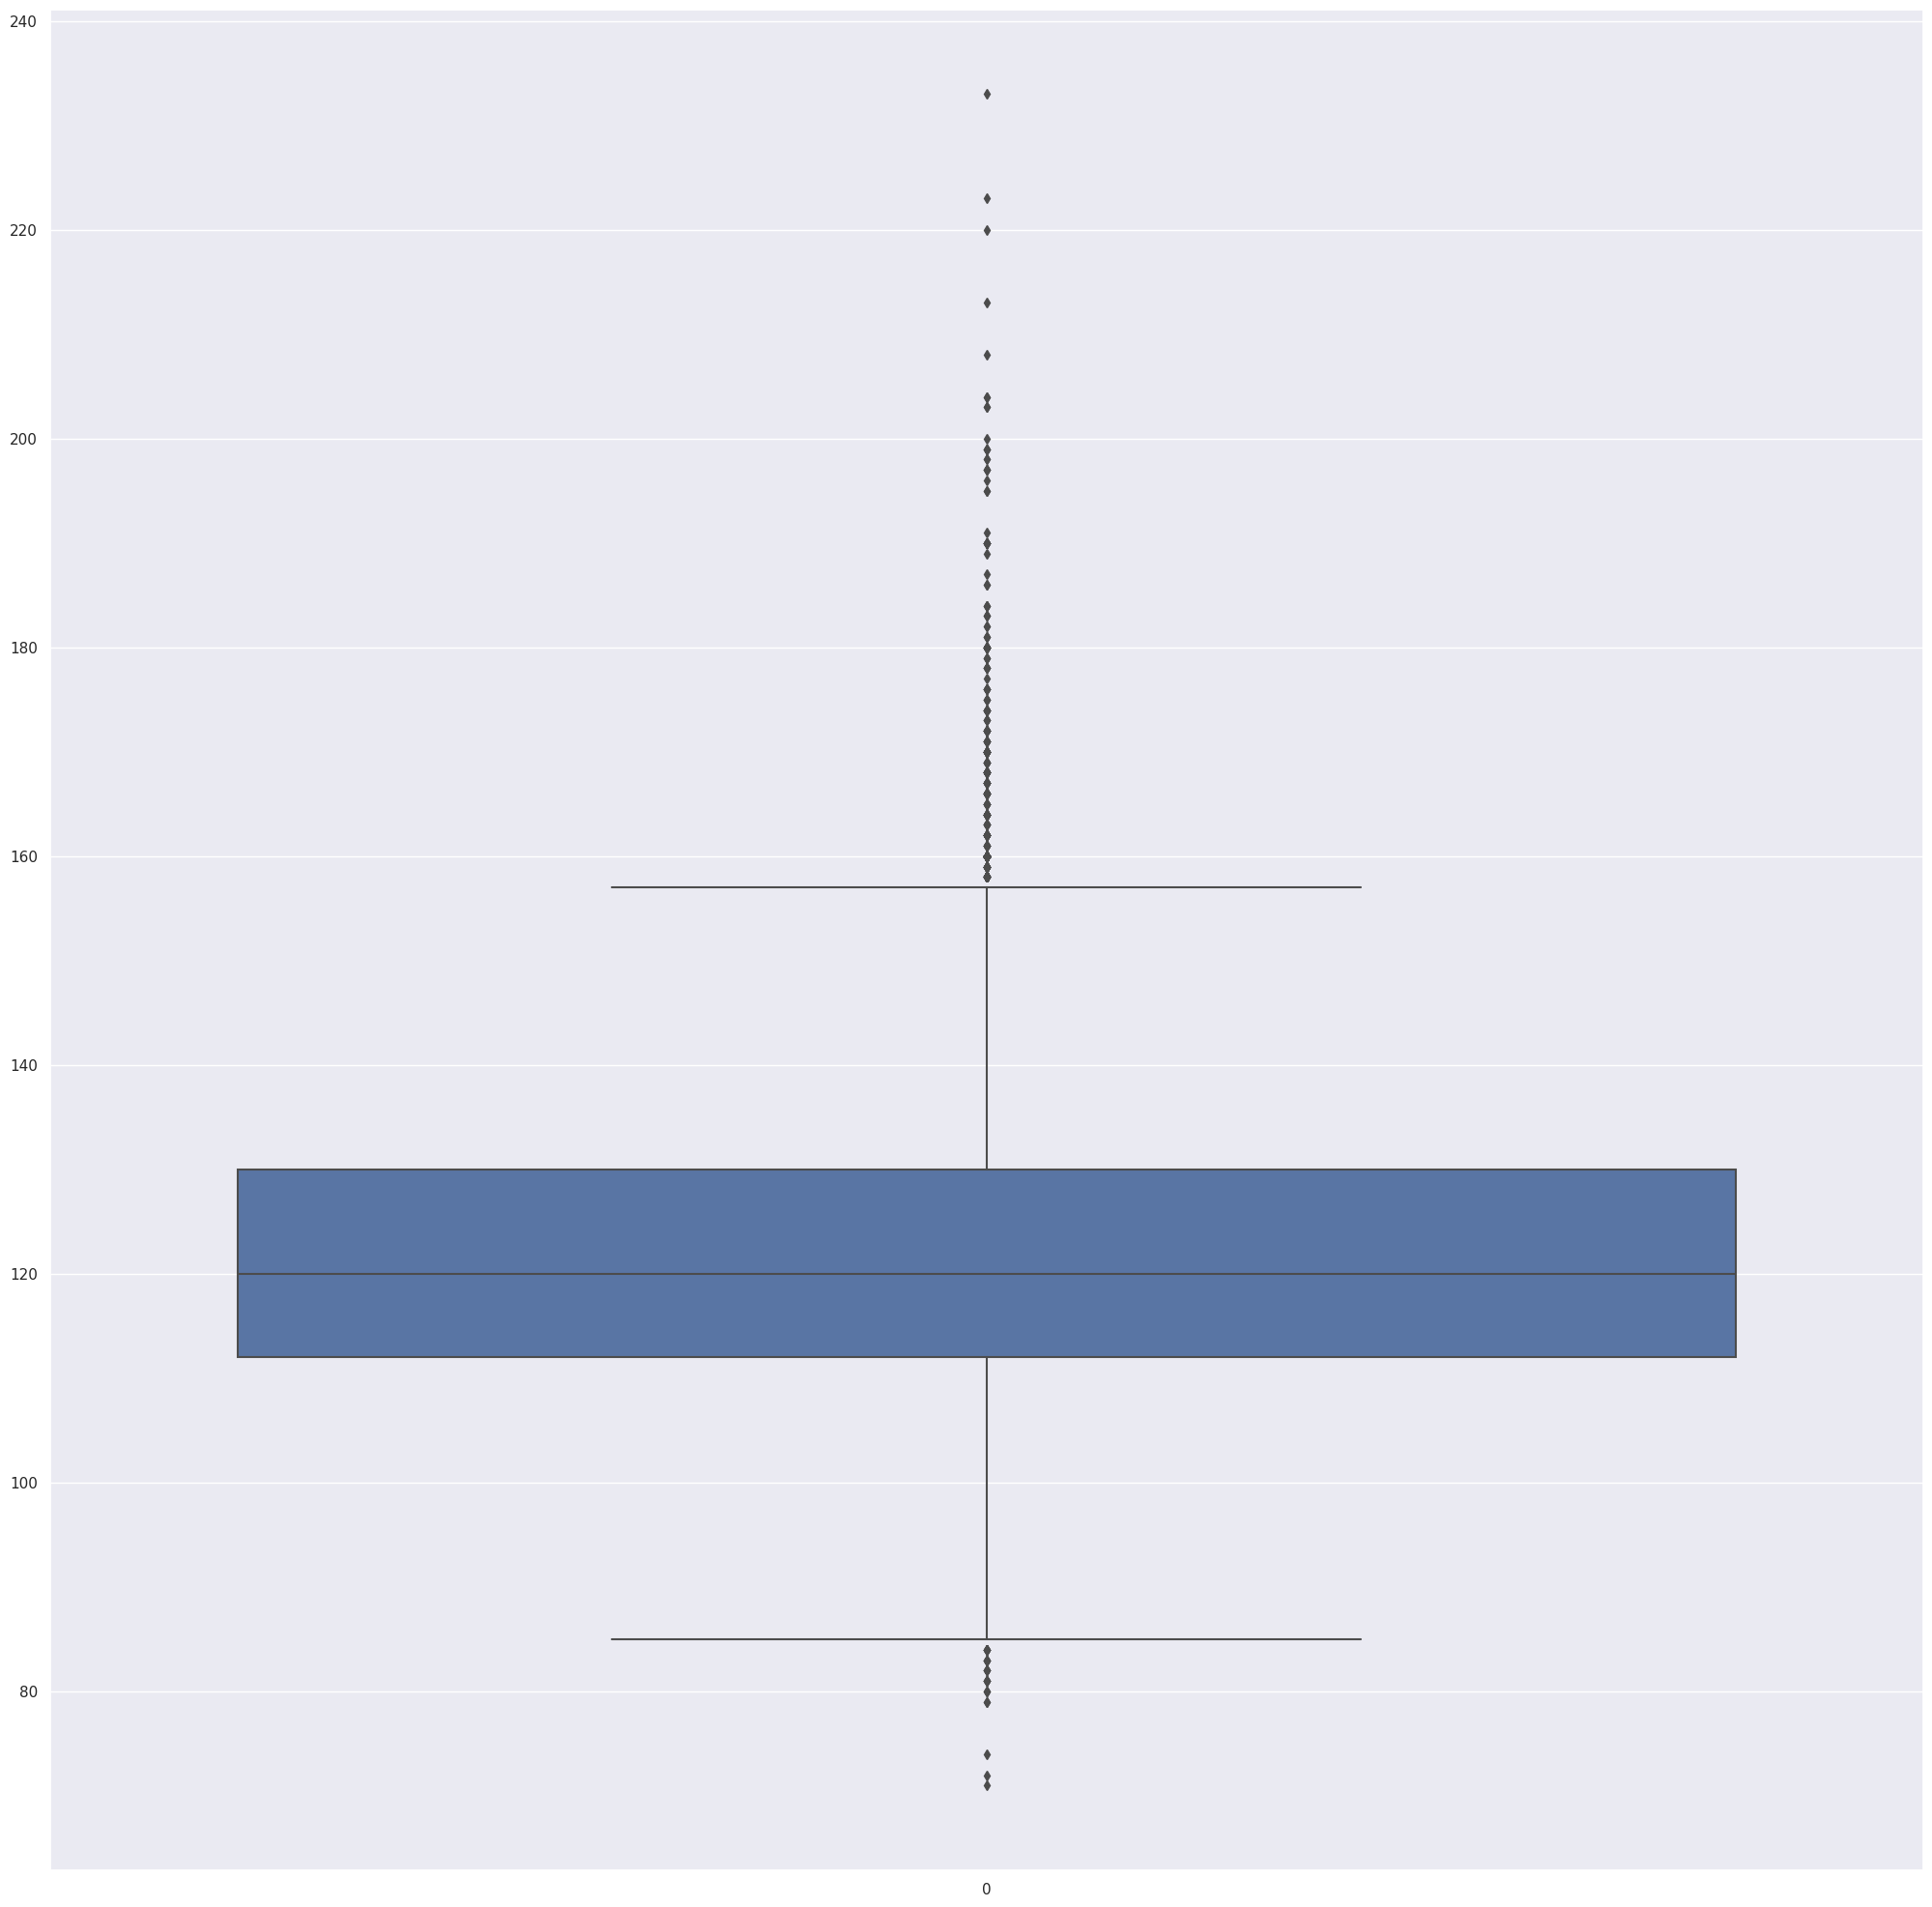

In [ ]:
sns.boxplot(df.systolic)
sns.set(rc={'figure.figsize':(4, 4)})

In [ ]:
def Systolic(x):
  if x >= 50 and x <= 180:
    return x
  else:
    return df.systolic.median()

df.systolic = df.systolic.apply(lambda x: Systolic(x))

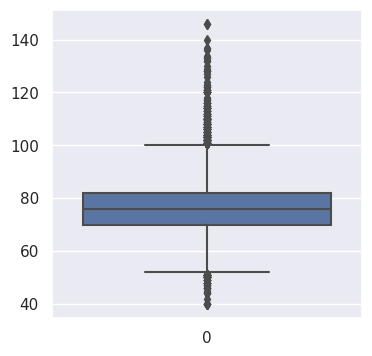

In [ ]:
sns.boxplot(df.relaxation)
sns.set(rc={'figure.figsize':(4, 4)})

In [ ]:
def Relaxation(x):
  if x >= 40 and x <= 110:
    return x
  else:
    return df.relaxation.median()

df.relaxation = df.relaxation.apply(lambda x: Relaxation(x))

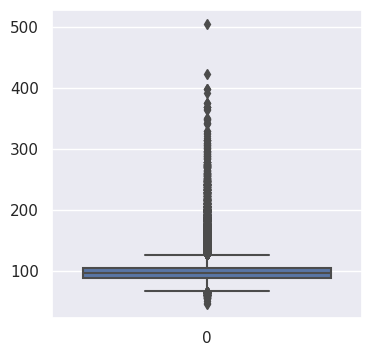

In [ ]:
sns.boxplot(df['fasting blood sugar'])
sns.set(rc={'figure.figsize':(5, 5)})

In [ ]:
def Sugar(x): #50-380
  if x >= 50 and x <= 380:
    return x
  else:
    return df['fasting blood sugar'].median()

df['fasting blood sugar'] = df['fasting blood sugar'].apply(lambda x: Sugar(x))

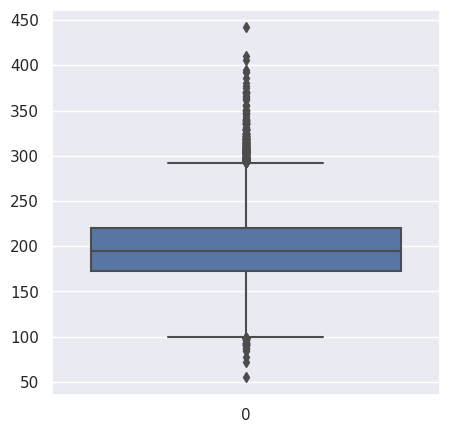

In [ ]:
sns.boxplot(df.Cholesterol) #239
sns.set(rc={'figure.figsize':(4, 4)})

In [ ]:
'''def Ch(x): #239
  if x <= 350:
    return x
  else:
    return df.Cholesterol.median()

df['Cholesterol'] = df['Cholesterol'].apply(lambda x: Ch(x))'''

"def Ch(x): #239\n  if x <= 350:\n    return x\n  else:\n    return df.Cholesterol.median()\n\ndf['Cholesterol'] = df['Cholesterol'].apply(lambda x: Ch(x))"

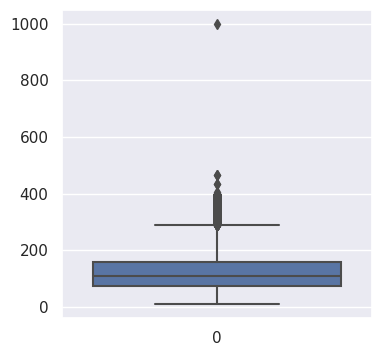

In [ ]:
sns.boxplot(df.triglyceride)
sns.set(rc={'figure.figsize':(4, 4)})

In [ ]:
def T(x):
  if x <= 500:
    return x
  else:
    return df.triglyceride.mode()[0]

df['triglyceride'] = df['triglyceride'].apply(lambda x: T(x))

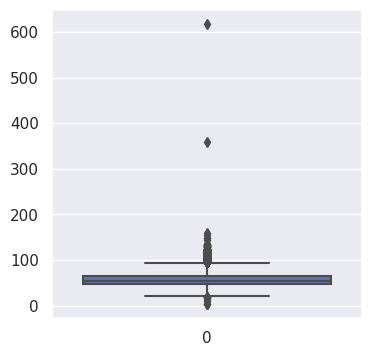

In [ ]:
sns.boxplot(df.HDL) #<40 критично
sns.set(rc={'figure.figsize':(6, 6)})

In [ ]:
def HDL(x):
  if x <= 200:
    return x
  else:
    return df.LDL.median()

df['HDL'] = df['HDL'].apply(lambda x: HDL(x))

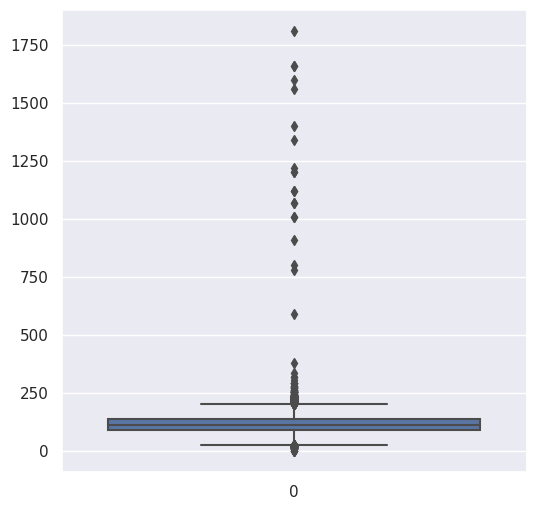

In [ ]:
sns.boxplot(df.LDL)
sns.set(rc={'figure.figsize':(6, 6)})

In [ ]:
def LDL(x): #159
  if x <= 500:
    return x
  else:
    return df.LDL.median()

df['LDL'] = df['LDL'].apply(lambda x: LDL(x))

In [ ]:
df['Urine protein'].value_counts()

1.0    42075
2.0     1441
3.0      768
4.0      190
5.0       71
6.0        9
Name: Urine protein, dtype: int64

In [ ]:
df['serum creatinine'].value_counts()

0.9     9023
0.8     8441
1.0     7853
0.7     5898
1.1     4954
0.6     3574
1.2     2311
0.5     1191
1.3      705
1.4      233
0.4      165
1.5       80
1.6       32
0.1       20
1.8       13
0.3       12
1.7       11
2.0        8
1.9        7
2.6        2
2.2        2
3.4        2
2.5        2
2.1        2
2.3        1
11.6       1
5.9        1
3.2        1
10.0       1
5.0        1
6.4        1
9.9        1
0.2        1
7.5        1
10.3       1
3.0        1
7.4        1
Name: serum creatinine, dtype: int64

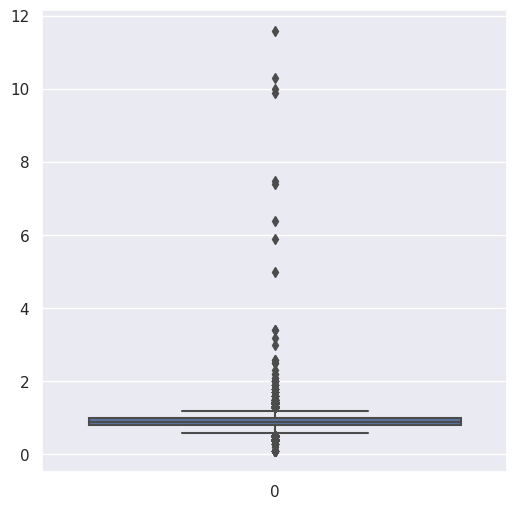

In [ ]:
sns.boxplot(df['serum creatinine'])
sns.set(rc={'figure.figsize':(8, 6)})

In [ ]:
def Ser(x):
  if x <= 2:
    return x
  else:
    return df['serum creatinine'].median()

df['serum creatinine'] = df['serum creatinine'].apply(lambda x: Ser(x))

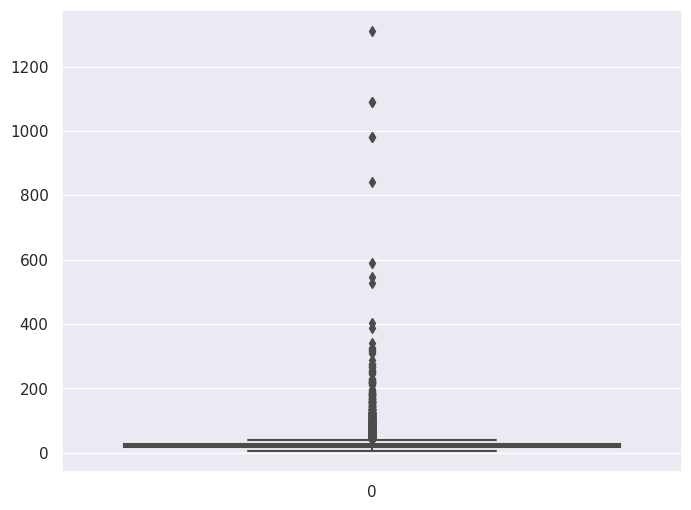

In [ ]:
sns.boxplot(df.AST) #до 60 норма
sns.set(rc={'figure.figsize':(6,10)})

In [ ]:
def AST(x):
  if x <= 200:
    return x
  else:
    return df.AST.median()

df['AST'] = df['AST'].apply(lambda x: AST(x))

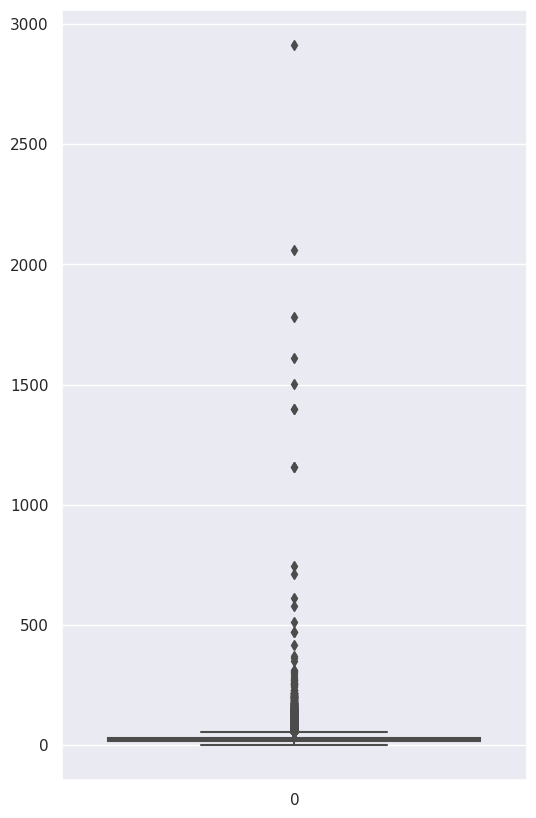

In [ ]:
sns.boxplot(df.ALT) #до 60 норма
sns.set(rc={'figure.figsize':(6,6)})

In [ ]:
def ALT(x): 
  if x <= 200:
    return x
  else:
    return df.ALT.median()

df['ALT'] = df['ALT'].apply(lambda x: ALT(x))

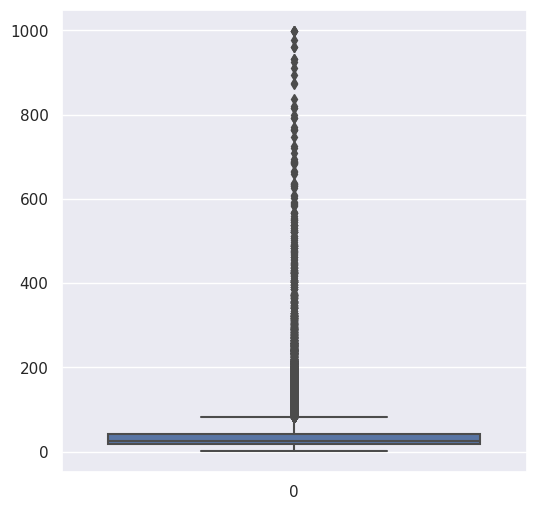

In [ ]:
sns.boxplot(df.Gtp)
sns.set(rc={'figure.figsize':(6,6)})

In [ ]:
def gtp(x): #187
  if x <= 200:
    return x
  else:
    return df.Gtp.median()

df['Gtp'] = df['Gtp'].apply(lambda x: gtp(x))

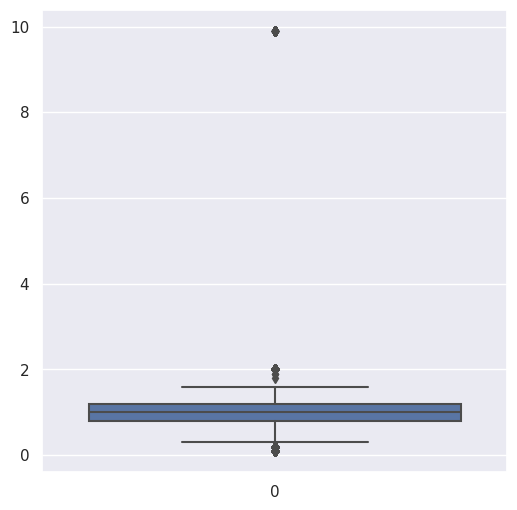

In [ ]:
sns.boxplot(df['eyesight(left)'])
sns.set(rc={'figure.figsize':(6,6)})

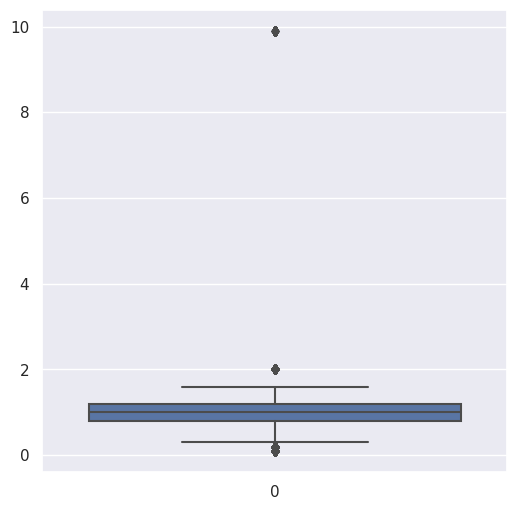

In [ ]:
sns.boxplot(df['eyesight(right)'])
sns.set(rc={'figure.figsize':(6,6)})

In [ ]:
def eye(x): 
  if x <= 2:
    return x
  else:
    return df['eyesight(left)'].median()

df['eyesight(left)'] = df['eyesight(left)'].apply(lambda x: eye(x))
df['eyesight(right)'] = df['eyesight(right)'].apply(lambda x: eye(x))

Признак индекс массы тела был вспомогательным, он зависит от роста и веса, поэтому удалим его.

In [ ]:
df = df.drop('ima', axis = 1)

# Матрица корреляции

Несколько достаточно коррелирующих признаков - рост и вес, вес и обхват талии, зрение на правом и на левом глазу, слух на правом и на левом ухе, верхнее и нижнее давление, 
LDL и Cholesterin - что понятно, т.к. LDL является частью total cholesterin, AST и ALT. 

Попробуем убрать некоторые из них и посмотреть как поменяются метрики.


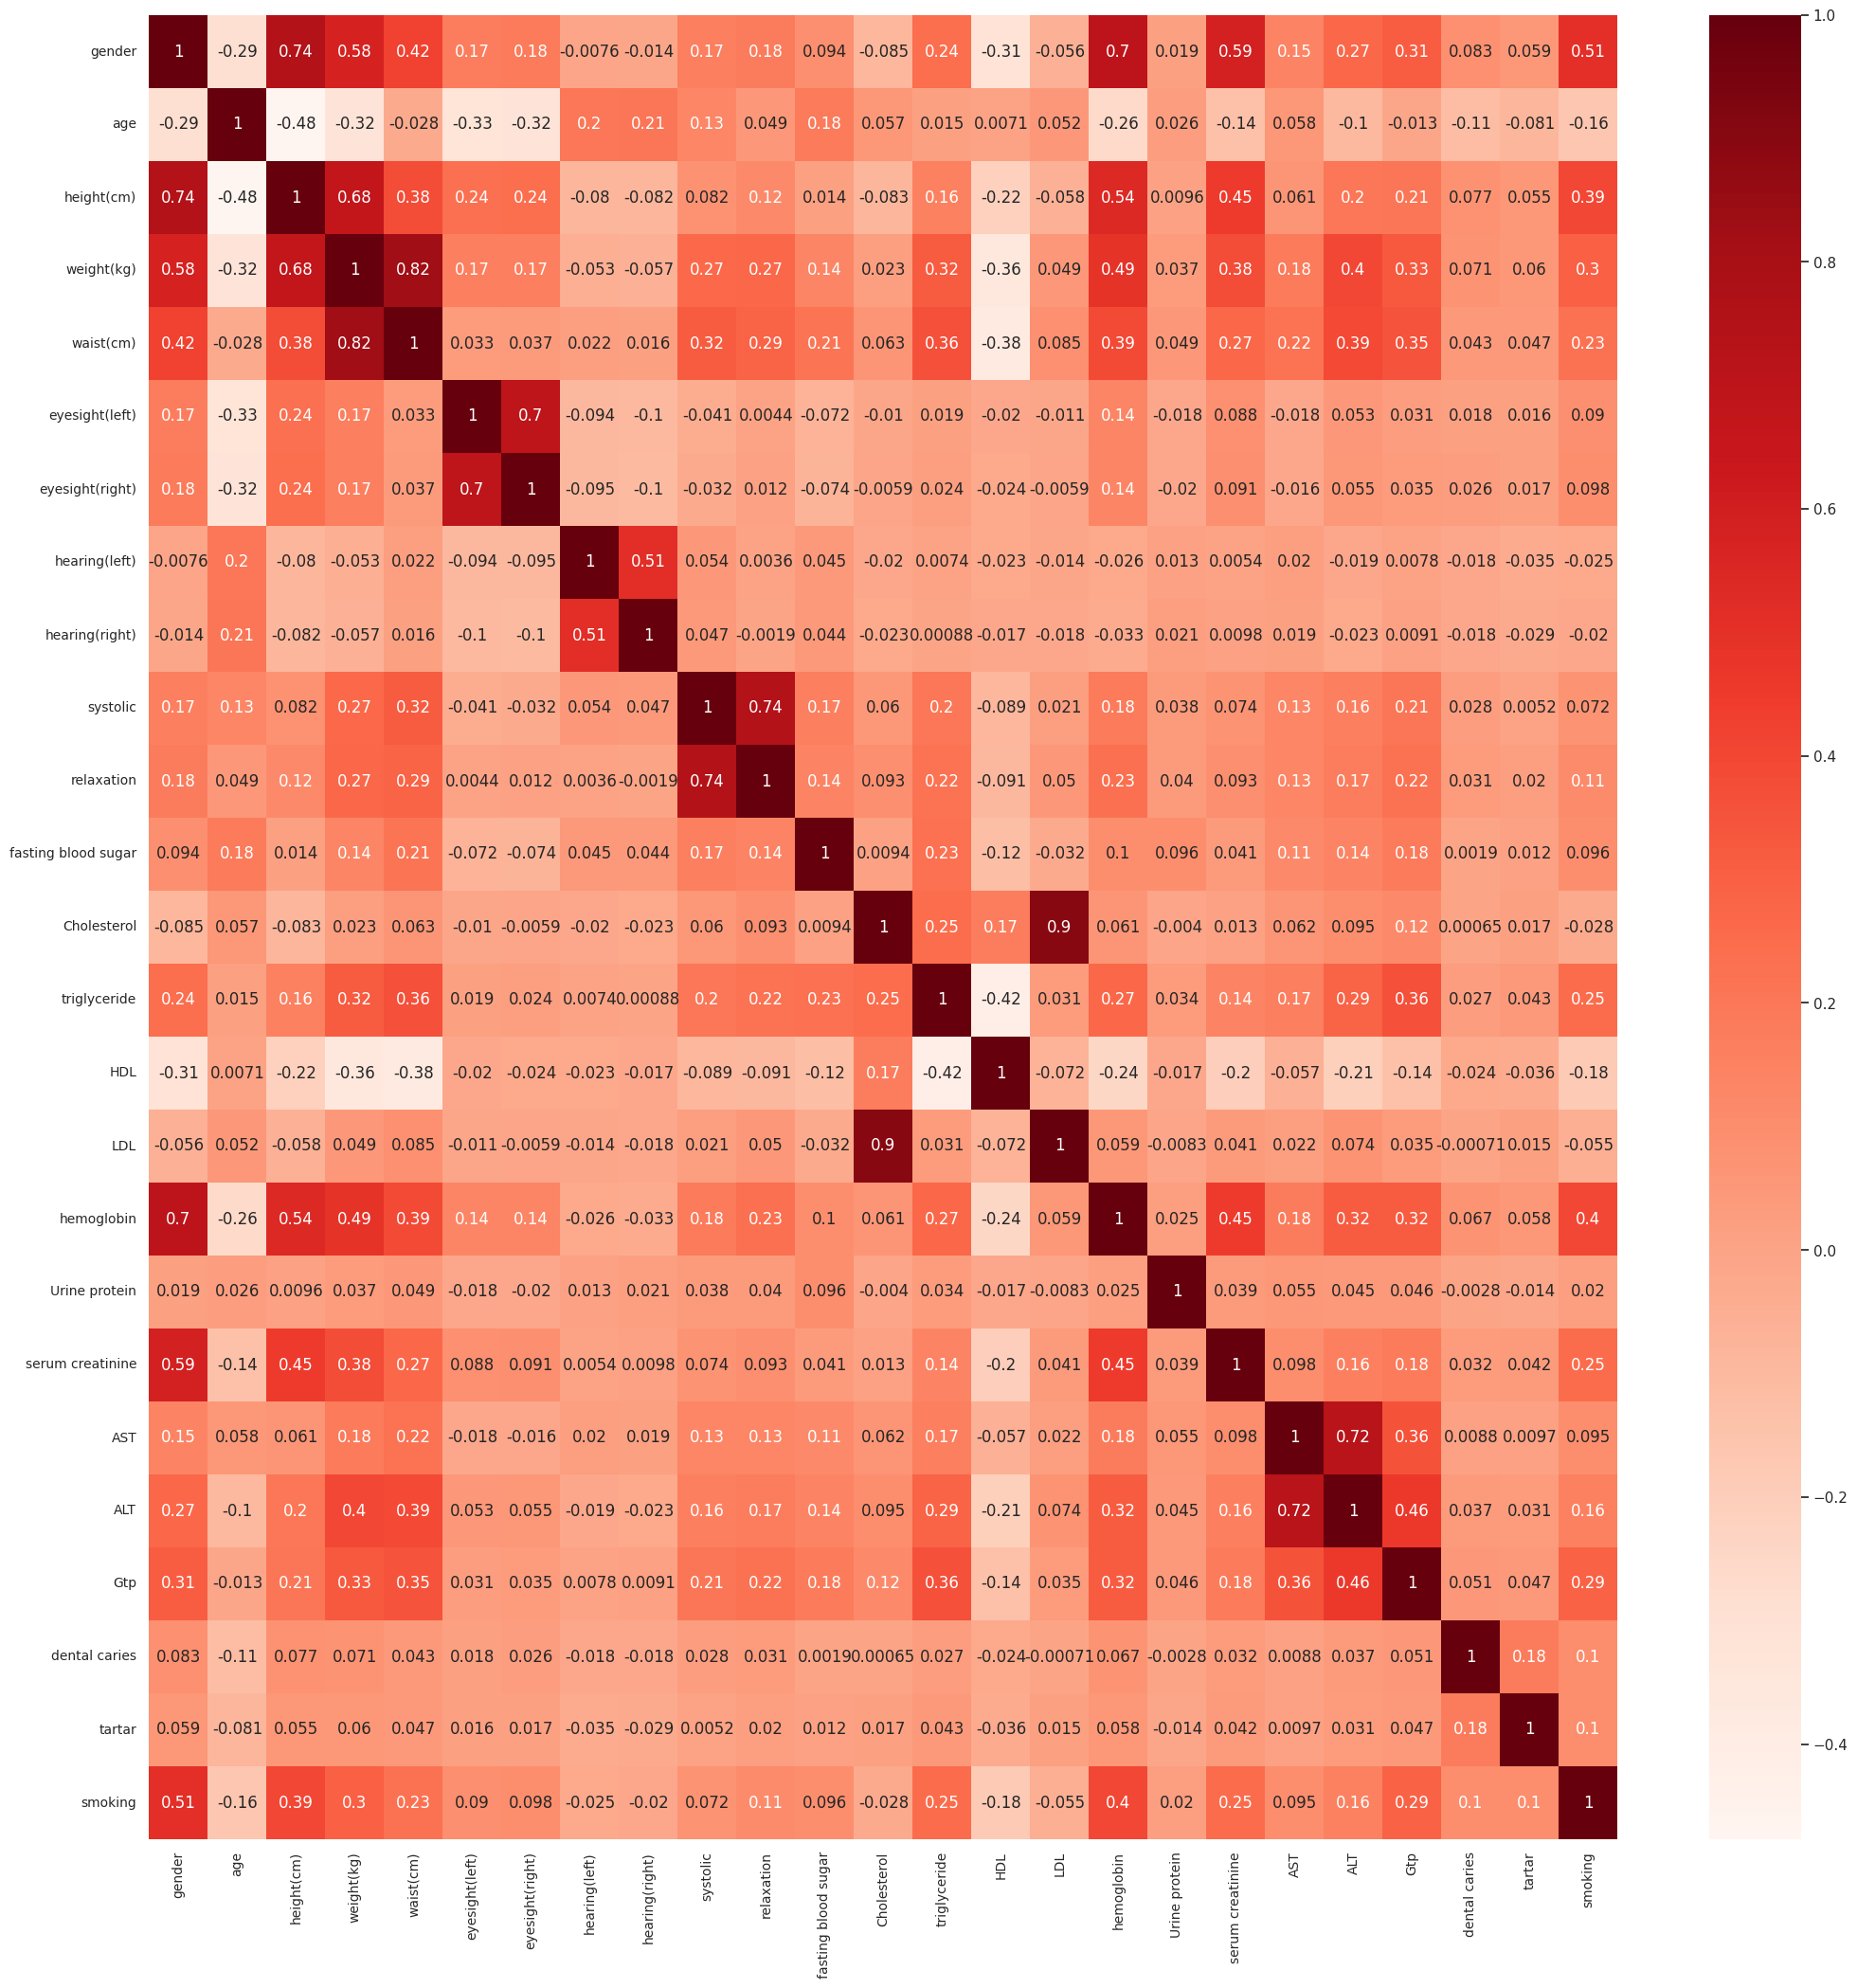

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(25, 25)})
sns.heatmap(df.corr(), annot = True, cmap = "Reds")
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
y = df.smoking
df = df.drop('smoking', axis = 1)

In [ ]:
y.value_counts()

0    28170
1    16384
Name: smoking, dtype: int64

In [ ]:
df = df.drop(['waist(cm)', 'height(cm)', 'hearing(left)', 'LDL', 'relaxation', 'ALT', 'eyesight(right)'], axis = 1)

# Масштабирование

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mmsc = MinMaxScaler()

X_norm = mmsc.fit_transform(df)

X_norm = pd.DataFrame(X_norm, columns = df.columns)

X_norm

,gender,age,weight(kg),eyesight(left),hearing(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar
0,1.0,0.538462,0.285714,0.368421,0.0,0.614679,0.117284,0.483204,0.375824,0.329032,0.672840,0.0,0.473684,0.078534,0.101010,0.0,0.0
1,1.0,0.307692,0.380952,0.736842,0.0,0.266055,0.138889,0.689922,0.534066,0.264516,0.604938,0.0,0.473684,0.068063,0.080808,0.0,1.0
2,0.0,0.307692,0.285714,0.473684,0.0,0.449541,0.089506,0.333333,0.138462,0.374194,0.469136,0.0,0.263158,0.052356,0.101010,0.0,0.0
3,1.0,0.153846,0.428571,0.578947,0.0,0.522936,0.135802,0.418605,0.413187,0.283871,0.697531,0.0,0.578947,0.062827,0.156566,0.0,1.0
4,1.0,0.307692,0.285714,0.473684,0.0,0.412844,0.132716,0.441860,0.125275,0.329032,0.746914,0.0,0.315789,0.078534,0.186869,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44549,0.0,0.615385,0.190476,0.473684,0.0,0.284404,0.104938,0.320413,0.092308,0.309677,0.475309,0.0,0.368421,0.104712,0.060606,0.0,1.0
44550,0.0,0.384615,0.190476,0.578947,0.0,0.275229,0.117284,0.286822,0.127473,0.445161,0.561728,0.0,0.421053,0.073298,0.060606,0.0,1.0
44551,0.0,0.538462,0.190476,0.473684,0.0,0.422018,0.114198,0.266150,0.145055,0.483871,0.462963,0.0,0.210526,0.057592,0.050505,0.0,0.0
44552,1.0,0.615385,0.285714,0.368421,0.0,0.568807,0.172840,0.400517,0.149451,0.283871,0.586420,0.0,0.315789,0.073298,0.080808,0.0,0.0


In [ ]:
std = StandardScaler()

X_std = std.fit_transform(df)

X_std = pd.DataFrame(X_std, columns = df.columns)

X_std

,gender,age,weight(kg),eyesight(left),hearing(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar
0,0.755216,0.900933,-0.458106,-0.607914,-0.164653,1.233598,-0.500904,1.243940,0.773390,-0.157252,0.752820,-0.215708,0.608293,-0.385142,-0.455066,-0.520517,-1.119701
1,0.755216,-0.345450,0.321701,1.542763,-0.164653,-1.591246,-0.159925,3.448986,1.780379,-0.846243,0.048630,-0.215708,0.608293,-0.545436,-0.591158,-0.520517,0.893095
2,-1.324125,-0.345450,-0.458106,0.006565,-0.164653,-0.104486,-0.939306,-0.354718,-0.737094,0.325042,-1.359750,-0.215708,-1.492831,-0.785877,-0.455066,-0.520517,-1.119701
3,0.755216,-1.176372,0.711605,0.621044,-0.164653,0.490218,-0.208636,0.554863,1.011151,-0.639546,1.008889,-0.215708,1.658855,-0.625583,-0.080813,-0.520517,0.893095
4,0.755216,-0.345450,-0.458106,0.006565,-0.164653,-0.401838,-0.257348,0.802931,-0.821009,-0.157252,1.521028,-0.215708,-0.967550,-0.385142,0.123325,1.921167,0.893095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44549,-1.324125,1.316394,-1.237913,0.006565,-0.164653,-1.442570,-0.695750,-0.492534,-1.030799,-0.363950,-1.295733,-0.215708,-0.442269,0.015593,-0.727250,-0.520517,0.893095
44550,-1.324125,0.070011,-1.237913,0.621044,-0.164653,-1.516908,-0.500904,-0.850854,-0.807023,1.082932,-0.399491,-0.215708,0.083012,-0.465289,-0.727250,-0.520517,0.893095
44551,-1.324125,0.900933,-1.237913,0.006565,-0.164653,-0.327500,-0.549616,-1.071358,-0.695136,1.496327,-1.423768,-0.215708,-2.018112,-0.705730,-0.795296,-0.520517,-1.119701
44552,0.755216,1.316394,-0.458106,-0.607914,-0.164653,0.861908,0.375900,0.361922,-0.667164,-0.639546,-0.143422,-0.215708,-0.967550,-0.465289,-0.591158,-0.520517,-1.119701


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.15, random_state = 33)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred)) #доля правильных ответов
print("Precision : ", precision_score(y_test, y_pred)) #доля названных положительными и действетльно явл положительными
print("Recall : ", recall_score(y_test, y_pred)) #доля объектов положительного класса, которые нашел алгоритм из всех объектов положительного класса
print("F-Мера : ", 2 * precision_score(y_test, y_pred) * recall_score(y_test, y_pred) / (recall_score(y_test, y_pred) + precision_score(y_test, y_pred))) 

Accuracy :  0.7538898862956314
Precision :  0.6574564723694171
Recall :  0.7012515139281389
F-Мера :  0.6786481734713811


Text(28.75, 0.5, 'True Class')

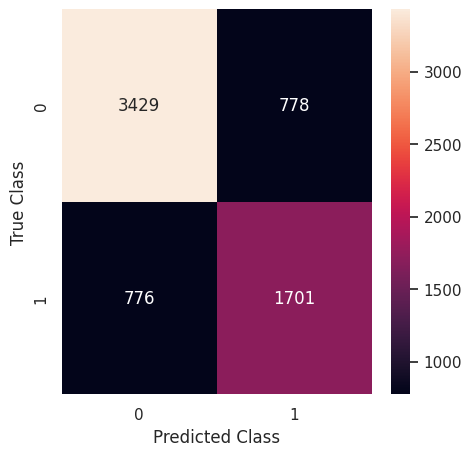

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(5, 5)})
sns.heatmap(cm, annot = True,  fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

#3302 - не курят и определены как не курящие. 905 - не курят, но определены как курящие. 740 - курят, но определены как не курящие. 1737 - курят и определены как курящие.

In [ ]:
coef = pd.DataFrame((model.coef_).T, columns = ['coef'])
coef['features'] = df.columns
coef

,coef,features
0,3.153183,gender
1,-0.213482,age
2,-0.752300,weight(kg)
3,-0.039796,eyesight(left)
4,-0.099801,hearing(right)
5,-1.242004,systolic
6,0.967159,fasting blood sugar
7,-1.067668,Cholesterol
8,2.118074,triglyceride
9,0.792622,HDL


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.15, random_state = 33)

model2 = LogisticRegression(max_iter = 10000)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred)) 
print("Precision : ", precision_score(y_test, y_pred)) 
print("Recall : ", recall_score(y_test, y_pred)) 
print("F-Мера : ", 2 * precision_score(y_test, y_pred) * recall_score(y_test, y_pred) / (recall_score(y_test, y_pred) + precision_score(y_test, y_pred)))

Accuracy :  0.7544883303411131
Precision :  0.6586940015186029
Recall :  0.7004440855874041
F-Мера :  0.6789278027783213


Text(28.75, 0.5, 'True Class')

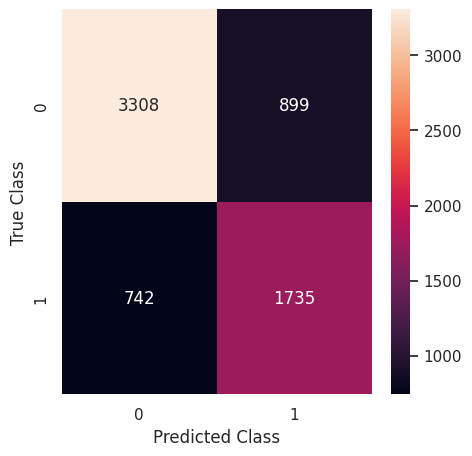

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(5, 5)})
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

In [ ]:
coef = pd.DataFrame((model2.coef_).T, columns = ['coef'])
coef['features'] = df.columns
coef

,coef,features
0,3.180138,gender
1,-0.003368,age
2,-0.007197,weight(kg)
3,-0.025696,eyesight(left)
4,-0.049604,hearing(right)
5,-0.011741,systolic
6,0.003102,fasting blood sugar
7,-0.002829,Cholesterol
8,0.004716,triglyceride
9,0.005345,HDL


# Тест

In [ ]:
t = pd.read_csv('smoking_test.csv', sep = ',')
id = t.ID
t = t.drop('ID', axis = 1)
t

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,M,40.0,180,75.0,85.0,1.0,1.2,1.0,1.0,128.0,...,145.0,14.5,1.0,1.0,17.0,18.0,30.0,Y,0,N
1,M,25.0,180,75.0,83.8,0.8,1.2,1.0,1.0,116.0,...,99.0,15.3,1.0,0.9,18.0,14.0,22.0,Y,0,Y
2,F,50.0,155,65.0,86.3,0.3,1.2,1.0,1.0,101.0,...,120.0,13.4,1.0,0.7,19.0,21.0,13.0,Y,0,N
3,F,40.0,155,45.0,74.0,1.2,1.0,1.0,1.0,104.0,...,105.0,13.6,1.0,0.6,18.0,16.0,16.0,Y,0,Y
4,M,30.0,175,70.0,79.0,0.8,1.2,1.0,1.0,119.0,...,57.0,16.6,1.0,0.9,18.0,11.0,22.0,Y,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,F,50.0,160,55.0,66.2,0.6,0.4,1.0,1.0,118.0,...,178.0,12.5,1.0,0.8,22.0,17.0,16.0,Y,0,N
11134,M,30.0,165,65.0,76.0,1.0,1.5,1.0,1.0,130.0,...,147.0,14.9,1.0,1.1,32.0,31.0,19.0,Y,0,Y
11135,F,70.0,145,50.0,81.0,0.8,0.9,1.0,1.0,120.0,...,80.0,14.9,1.0,0.7,36.0,32.0,19.0,Y,0,N
11136,M,40.0,175,80.0,82.2,0.7,0.5,1.0,1.0,130.0,...,110.0,18.0,1.0,1.2,36.0,52.0,71.0,Y,1,Y


In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11138 entries, 0 to 11137
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               11138 non-null  object 
 1   age                  11021 non-null  float64
 2   height(cm)           11138 non-null  int64  
 3   weight(kg)           11126 non-null  float64
 4   waist(cm)            11138 non-null  float64
 5   eyesight(left)       11138 non-null  float64
 6   eyesight(right)      11138 non-null  float64
 7   hearing(left)        11138 non-null  float64
 8   hearing(right)       11138 non-null  float64
 9   systolic             11138 non-null  float64
 10  relaxation           11138 non-null  float64
 11  fasting blood sugar  11138 non-null  float64
 12  Cholesterol          11138 non-null  float64
 13  triglyceride         11138 non-null  float64
 14  HDL                  11138 non-null  float64
 15  LDL                  11138 non-null 

In [ ]:
t.age = t.age.fillna(t.age.mode()[0])

t['ima'] = t['weight(kg)'] / (t['height(cm)'] * 0.01) ** 2
t['weight(kg)'] = t['weight(kg)'].fillna(t.ima.mode()[0] * (t['height(cm)'] * 0.01) ** 2)
t['ima'] = t['weight(kg)'] / (t['height(cm)'] * 0.01) ** 2

In [ ]:
t.isna().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
ima                    0
dtype: int64

In [ ]:
t.oral.value_counts()

Y    11138
Name: oral, dtype: int64

In [ ]:
s = {'F': 0, 'M': 1}
t['gender'] = t['gender'].map(s)
t.tartar = t.tartar.replace({'Y': 1, 'N' : 0})
t = t.drop(['oral', 'ima'], axis = 1)

In [ ]:
t = t.drop(['waist(cm)', 'height(cm)', 'hearing(left)', 'LDL', 'relaxation', 'ALT', 'eyesight(right)'], axis = 1)

In [ ]:
t.systolic = t.systolic.apply(lambda x: Systolic(x))
t['fasting blood sugar'] = t['fasting blood sugar'].apply(lambda x: Sugar(x))
#t['Cholesterol'] = t['Cholesterol'].apply(lambda x: Ch(x))
t['triglyceride'] = t['triglyceride'].apply(lambda x: T(x))
t['serum creatinine'] = t['serum creatinine'].apply(lambda x: Ser(x))
t['AST'] = t['AST'].apply(lambda x: AST(x))
t['Gtp'] = t['Gtp'].apply(lambda x: gtp(x))
t['HDL'] = t['HDL'].apply(lambda x: HDL(x))
t['eyesight(left)'] = t['eyesight(left)'].apply(lambda x: eye(x))

#t['eyesight(right)'] = t['eyesight(right)'].apply(lambda x: eye(x))
#t['ALT'] = t['ALT'].apply(lambda x: ALT(x))
#t['LDL'] = t['LDL'].apply(lambda x: LDL(x))
#t.relaxation = t.relaxation.apply(lambda x: Relaxation(x))

In [ ]:
mmsc1 = MinMaxScaler()

X_norm1 = mmsc.fit_transform(t)

X_norm1 = pd.DataFrame(X_norm1, columns = t.columns)

X_norm1

,gender,age,weight(kg),eyesight(left),hearing(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar
0,1.0,0.307692,0.470588,0.473684,0.0,0.474747,0.145985,0.347826,0.209719,0.266187,0.620690,0.0,0.473684,0.047872,0.145729,0.0,0.0
1,1.0,0.076923,0.470588,0.368421,0.0,0.353535,0.167883,0.233696,0.176471,0.215827,0.675862,0.0,0.421053,0.053191,0.105528,0.0,1.0
2,0.0,0.461538,0.352941,0.105263,0.0,0.202020,0.124088,0.334239,0.268542,0.280576,0.544828,0.0,0.315789,0.058511,0.060302,0.0,0.0
3,0.0,0.307692,0.117647,0.578947,0.0,0.232323,0.145985,0.282609,0.127877,0.330935,0.558621,0.0,0.263158,0.053191,0.075377,0.0,1.0
4,1.0,0.153846,0.411765,0.368421,0.0,0.383838,0.145985,0.255435,0.184143,0.575540,0.765517,0.0,0.421053,0.053191,0.105528,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,0.0,0.461538,0.235294,0.263158,0.0,0.373737,0.098540,0.562500,0.163683,0.532374,0.482759,0.0,0.368421,0.074468,0.075377,0.0,0.0
11134,1.0,0.153846,0.352941,0.473684,0.0,0.494949,0.124088,0.375000,0.125320,0.280576,0.648276,0.0,0.526316,0.127660,0.090452,0.0,1.0
11135,0.0,0.769231,0.176471,0.368421,0.0,0.393939,0.156934,0.211957,0.496164,0.309353,0.648276,0.0,0.315789,0.148936,0.090452,0.0,0.0
11136,1.0,0.307692,0.529412,0.315789,0.0,0.494949,0.525547,0.399457,0.943734,0.151079,0.862069,0.0,0.578947,0.148936,0.351759,1.0,1.0


In [ ]:
answer = model.predict(X_norm1)
result = pd.DataFrame()
result['ID'] = id
result['smoking'] = answer
result['smoking'] = result['smoking'].replace({1 : 'yes', 0 : 'no'})
result.to_csv('Smoking_res_norm.csv', sep = ',', index = False)
result

,ID,smoking
0,48715,no
1,49650,yes
2,18013,no
3,24282,no
4,9215,yes
...,...,...
11133,20787,no
11134,5000,no
11135,36617,no
11136,38229,yes


In [ ]:
answer = model2.predict(t)
result = pd.DataFrame()
result['ID'] = id
result['smoking'] = answer
result['smoking'] = result['smoking'].replace({1 : 'yes', 0 : 'no'})
result.to_csv('Smoking_res.csv', sep = ',', index = False)
result

,ID,smoking
0,48715,no
1,49650,yes
2,18013,no
3,24282,no
4,9215,yes
...,...,...
11133,20787,no
11134,5000,no
11135,36617,no
11136,38229,yes


In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import model_selection
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred)) 
print("Precision : ", precision_score(y_test, y_pred)) 
print("Recall : ", recall_score(y_test, y_pred))
print("F-Мера : ", 2 * precision_score(y_test, y_pred) * recall_score(y_test, y_pred) / (recall_score(y_test, y_pred) + precision_score(y_test, y_pred))) 

Accuracy :  0.7684021543985637
Precision :  0.6857257097161136
Recall :  0.6923698021800565
F-Мера :  0.6890317396544797


In [ ]:
answer = clf.predict(X_norm1) #0,7 ; 0,36
result = pd.DataFrame()
result['ID'] = id
result['smoking'] = answer
result['smoking'] = result['smoking'].replace({1 : 'yes', 0 : 'no'})
result.to_csv('Smoking_res.csv', sep = ',', index = False)
result

,ID,smoking
0,48715,no
1,49650,yes
2,18013,yes
3,24282,yes
4,9215,no
...,...,...
11133,20787,yes
11134,5000,yes
11135,36617,yes
11136,38229,yes


In [ ]:
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(n_estimators = 1000, random_state=0).fit(X_train, y_train)
y_pred = cl.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred)) 
print("Precision : ", precision_score(y_test, y_pred)) 
print("Recall : ", recall_score(y_test, y_pred))
print("F-Мера : ", 2 * precision_score(y_test, y_pred) * recall_score(y_test, y_pred) / (recall_score(y_test, y_pred) + precision_score(y_test, y_pred))) 

Accuracy :  0.8264512268102933
Precision :  0.7469066366704162
Recall :  0.8041986273718208
F-Мера :  0.7744945567651632


In [ ]:
answer = cl.predict(X_norm1) #0,63
result = pd.DataFrame()
result['ID'] = id
result['smoking'] = answer
result['smoking'] = result['smoking'].replace({1 : 'yes', 0 : 'no'})
result.to_csv('Smoking_res.csv', sep = ',', index = False)
result

,ID,smoking
0,48715,yes
1,49650,yes
2,18013,no
3,24282,no
4,9215,yes
...,...,...
11133,20787,no
11134,5000,yes
11135,36617,no
11136,38229,yes
